In [1]:
import sys, os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time
from sklearn.linear_model import LinearRegression

In [2]:
# data_path = Path("G:\My Drive\Colab Notebooks\Zillow\data")
data_path = Path("/Users/mikeshih/Documents/data/zillow_data")

if (not 'df' in locals()) and data_path.joinpath('dfall_logerr.csv').is_file():
    print('load cache')  
    df = pd.read_pickle(data_path.joinpath('dfall_logerr.pkl')) 
elif (not 'df' in locals()) or (not data_path.joinpath('dfall_logerr.csv').is_file()):
    print('export to csv')
    df = pd.read_pickle(data_path.joinpath('dfall_logerr.pkl'))
    df.to_csv(data_path.joinpath('dfall_logerr.csv'), index = False)
    
df.info()

load cache
<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 362 to 5970723
Data columns (total 61 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      167888 non-null  string 
 1   airconditioningtypeid         167888 non-null  string 
 2   architecturalstyletypeid      167888 non-null  string 
 3   basementsqft                  167888 non-null  int64  
 4   bathroomcnt                   167888 non-null  float64
 5   bedroomcnt                    167888 non-null  int64  
 6   buildingclasstypeid           167888 non-null  string 
 7   buildingqualitytypeid         167888 non-null  string 
 8   calculatedbathnbr             167888 non-null  float64
 9   decktypeid                    167888 non-null  string 
 10  finishedfloor1squarefeet      167888 non-null  int64  
 11  calculatedfinishedsquarefeet  167888 non-null  int64  
 12  finishedsquarefeet12          

In [3]:
def printunique(df):
    for colname in df.columns:
        col_tmp = df[colname]
        print(colname)
        print(col_tmp.unique())
    return

In [4]:
# df_2016 = df[df['year_data'] == 2016]
df.reset_index(inplace=True, drop=True)
df['transactiondate_month'] = pd.DatetimeIndex(df['transactiondate']).month
df['transactiondate_year'] = pd.DatetimeIndex(df['transactiondate']).year
df.info()
# printunique(df_2016)
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167888 entries, 0 to 167887
Data columns (total 63 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      167888 non-null  string 
 1   airconditioningtypeid         167888 non-null  string 
 2   architecturalstyletypeid      167888 non-null  string 
 3   basementsqft                  167888 non-null  int64  
 4   bathroomcnt                   167888 non-null  float64
 5   bedroomcnt                    167888 non-null  int64  
 6   buildingclasstypeid           167888 non-null  string 
 7   buildingqualitytypeid         167888 non-null  string 
 8   calculatedbathnbr             167888 non-null  float64
 9   decktypeid                    167888 non-null  string 
 10  finishedfloor1squarefeet      167888 non-null  int64  
 11  calculatedfinishedsquarefeet  167888 non-null  int64  
 12  finishedsquarefeet12          167888 non-nul

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,year_data,logerror,transactiondate,transactiondate_month,transactiondate_year
0,17073783,NA,NA,-1,2.5,3,NA,NA,2.5,NA,...,76724,2015.06,False,-1,61110022003007,2016,0.095300,2016-01-27,1,2016
1,17088994,NA,NA,-1,1.0,2,NA,NA,1.0,NA,...,95870,2581.30,False,-1,61110015031002,2016,0.019800,2016-03-30,3,2016
2,17100444,NA,NA,-1,2.0,3,NA,NA,2.0,NA,...,14234,591.64,False,-1,61110007011007,2016,0.006000,2016-05-27,5,2016
3,17102429,NA,NA,-1,1.5,2,NA,NA,1.5,NA,...,17305,682.78,False,-1,61110008002013,2016,-0.056600,2016-06-07,6,2016
4,17109604,NA,NA,-1,2.5,4,NA,NA,2.5,NA,...,277000,5886.92,False,-1,61110014021007,2016,0.057300,2016-08-08,8,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167883,11928618,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,0.026665,2017-05-12,5,2017
167884,10813418,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,-0.008083,2017-01-03,1,2017
167885,11934023,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,-0.016600,2017-03-23,3,2017
167886,11490025,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,0.108073,2017-03-23,3,2017


In [5]:
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167888 entries, 0 to 167887
Data columns (total 63 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      167888 non-null  string 
 1   airconditioningtypeid         167888 non-null  string 
 2   architecturalstyletypeid      167888 non-null  string 
 3   basementsqft                  167888 non-null  int64  
 4   bathroomcnt                   167888 non-null  float64
 5   bedroomcnt                    167888 non-null  int64  
 6   buildingclasstypeid           167888 non-null  string 
 7   buildingqualitytypeid         167888 non-null  string 
 8   calculatedbathnbr             167888 non-null  float64
 9   decktypeid                    167888 non-null  string 
 10  finishedfloor1squarefeet      167888 non-null  int64  
 11  calculatedfinishedsquarefeet  167888 non-null  int64  
 12  finishedsquarefeet12          167888 non-nul

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,year_data,logerror,transactiondate,transactiondate_month,transactiondate_year
0,17073783,NA,NA,-1,2.5,3,NA,NA,2.5,NA,...,76724,2015.06,False,-1,61110022003007,2016,0.095300,2016-01-27,1,2016
1,17088994,NA,NA,-1,1.0,2,NA,NA,1.0,NA,...,95870,2581.30,False,-1,61110015031002,2016,0.019800,2016-03-30,3,2016
2,17100444,NA,NA,-1,2.0,3,NA,NA,2.0,NA,...,14234,591.64,False,-1,61110007011007,2016,0.006000,2016-05-27,5,2016
3,17102429,NA,NA,-1,1.5,2,NA,NA,1.5,NA,...,17305,682.78,False,-1,61110008002013,2016,-0.056600,2016-06-07,6,2016
4,17109604,NA,NA,-1,2.5,4,NA,NA,2.5,NA,...,277000,5886.92,False,-1,61110014021007,2016,0.057300,2016-08-08,8,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167883,11928618,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,0.026665,2017-05-12,5,2017
167884,10813418,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,-0.008083,2017-01-03,1,2017
167885,11934023,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,-0.016600,2017-03-23,3,2017
167886,11490025,NA,NA,-1,0.0,-1,NA,NA,0.0,NA,...,-1,0.00,False,-1,NA,2017,0.108073,2017-03-23,3,2017


<Axes: >

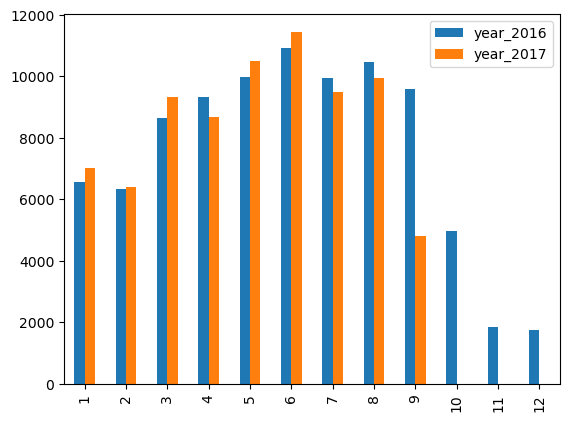

In [6]:
#print(df_2016_gb)
df_cat = []
for year in df['transactiondate_year'].unique():
    df_tmp = df[df['transactiondate_year'] == year]
    df_tmp_gb = df_tmp['transactiondate_month'].value_counts()
    df_tmp_gb.rename(f'year_{year}', inplace=True)
    df_cat.append(df_tmp_gb)
df_cat = pd.concat(df_cat, axis = 1)
df_cat.sort_index(inplace=True)
df_cat.plot(kind='bar')

In [20]:
# https://www.theclickreader.com/random-forest-regression/
from sklearn.preprocessing import OneHotEncoder # create one hot for strings
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import mean_squared_error # cost function
from sklearn.ensemble import RandomForestRegressor # call the regressor model
from sklearn.model_selection import cross_val_score

def seperate_string(df):
    colnms_string = []
    colnms_nostring = []
    for idx, value in enumerate(df.dtypes.items()):
        if value[1] == "string":
            colnms_string.append(value[0])
        else:
            colnms_nostring.append(value[0])

    df_string = df[colnms_string]
    df_nostring = df[colnms_nostring]

    return (df_nostring, df_string)

dropcol = ['parcelid', 'censustractandblock', 'transactiondate', 'propertyzoningdesc', 'regionidzip'] # remove id 
dropcol.extend(['logerror']) # remove prediction target

df_pre = df.drop(dropcol, axis = 1)
df_nostring, df_string = seperate_string(df_pre)
# df_string.info()
# printunique(df_string)

enc = OneHotEncoder(handle_unknown='ignore')
print(df_string.columns)

enc.fit(df_string)
dfarray = enc.transform(df_string).toarray()
dfcolnms = enc.get_feature_names_out(df_string.columns)

enc_df_string = pd.DataFrame(dfarray, columns = dfcolnms)
enc_df_string = enc_df_string.astype('int')
X = pd.concat([df_nostring, enc_df_string], axis = 1)

X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '##', x))

X.info()
y = df['logerror']

Index(['airconditioningtypeid', 'architecturalstyletypeid',
       'buildingclasstypeid', 'buildingqualitytypeid', 'decktypeid', 'fips',
       'propertycountylandusecode', 'propertylandusetypeid', 'storytypeid',
       'typeconstructiontypeid'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167888 entries, 0 to 167887
Columns: 196 entries, basementsqft to typeconstructiontypeid_NA
dtypes: bool(3), float64(5), int64(188)
memory usage: 247.7 MB


In [21]:
for type in X.dtypes.items():
    print(type)

('basementsqft', dtype('int64'))
('bathroomcnt', dtype('float64'))
('bedroomcnt', dtype('int64'))
('calculatedbathnbr', dtype('float64'))
('finishedfloor1squarefeet', dtype('int64'))
('calculatedfinishedsquarefeet', dtype('int64'))
('finishedsquarefeet12', dtype('int64'))
('finishedsquarefeet13', dtype('int64'))
('finishedsquarefeet15', dtype('int64'))
('finishedsquarefeet50', dtype('int64'))
('finishedsquarefeet6', dtype('int64'))
('fireplacecnt', dtype('int64'))
('fullbathcnt', dtype('int64'))
('garagecarcnt', dtype('int64'))
('garagetotalsqft', dtype('int64'))
('hashottuborspa', dtype('bool'))
('heatingorsystemtypeid', dtype('int64'))
('latitude', dtype('int64'))
('longitude', dtype('int64'))
('lotsizesquarefeet', dtype('float64'))
('poolcnt', dtype('int64'))
('poolsizesum', dtype('int64'))
('pooltypeid10', dtype('int64'))
('pooltypeid2', dtype('int64'))
('pooltypeid7', dtype('int64'))
('rawcensustractandblock', dtype('float64'))
('regionidcity', dtype('int64'))
('regionidcounty', d

In [14]:
printunique(X)

basementsqft
[  -1  616 1350  676  831 1528  234  485  814  760  196  690  238  802
  168  330 1551 1312  260  184  579  700  585  493 1048  540  100  515
  510  198  771  564  162  608  312  913 1555  671 1210  557  394  314
 1252  396  674  819  912  204  800 1416  384   90  640  380  254  600
 1809  645  786  669  512  273  300  900  200  224 1969   38  604  405
  112 3112  352 1218  588  280  252 3560  126]
bathroomcnt
[ 2.5  1.   2.   1.5  3.   7.   5.   0.   4.   4.5  3.5  5.5  6.  10.
  8.   9.   6.5 12.  11.   7.5  8.5 20.  15.  18.  13. ]
bedroomcnt
[ 3  2  4  5  6  1  0  8 10  7 12  9 13 11 15 16 14 -1]
calculatedbathnbr
[ 2.5  1.   2.   1.5  3.   7.   5.   0.   4.   4.5  3.5  5.5  6.  10.
  8.   9.   6.5 12.  11.   7.5  8.5 20.  15.  18.  13. ]
finishedfloor1squarefeet
[ 548  777 1101 ... 3396 4079 1966]
calculatedfinishedsquarefeet
[1264  777 1101 ... 4798 6895 6435]
finishedsquarefeet12
[1264  777 1101 ... 4798 6895 6435]
finishedsquarefeet13
[  -1 1440 1416 1344 1536 1584

AttributeError: 'DataFrame' object has no attribute 'unique'

In [32]:
from lightgbm import LGBMClassifier, LGBMRegressor

split_randonstate = 1947
model_randonstate = 1950
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = split_randonstate)
model = LGBMRegressor(n_estimators=1000,
                     num_leaves=100,
                     max_depth=10,
                     learning_rate=0.1,
                     random_state=model_randonstate,
                     n_jobs=-1)
start = time.time()
model.fit(X,y)
elapsed = time.time() - start
print(f'LGBM Training ran in {elapsed:.5f} seconds')

LGBM Training ran in 54.52564 seconds


In [33]:
y_pred = model.predict(x_test)
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.122


In [40]:
from xgboost import XGBClassifier, XGBRegressor

model = XGBRegressor(n_estimators=3000,
                     max_depth=170,
                     max_leaves=100,
                     eta=0.1,
                     reg_lambda=0,
                     tree_method='hist',
                     eval_metric='logloss',
                     use_label_encoder=False,
                     random_state=1000,
                     n_jobs=-1)
start = time.time()
model.fit(X,y)
elapsed = time.time() - start
print(f'LGBM Training ran in {elapsed:.5f} seconds')

LGBM Training ran in 71.60064 seconds


In [41]:
y_pred = model.predict(x_test)
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.055
